In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=0
%pylab inline
%load_ext autoreload
%autoreload 2

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import json
from ssl_neuron.datasets import GraphDataset, build_dataloader
from ssl_neuron.utils import plot_neuron, adjacency_to_neighbors

In [3]:
import matplotlib

#### Load config

In [23]:
config = json.load(open('../configs/config.json'))

In [24]:
config

{'model': {'num_classes': 1000,
  'dim': 32,
  'depth': 7,
  'n_head': 8,
  'pos_dim': 32,
  'move_avg': 0.999,
  'center_avg': 0.9,
  'teacher_temp': 0.06},
 'data': {'class': 'allen',
  'path': '/usr/users/agecker/datasets/neuron_morphology_allen/',
  'n_nodes': 200,
  'feat_dim': 8,
  'batch_size': 64,
  'num_workers': 6,
  'jitter_var': 1,
  'translate_var': 10,
  'rotation_axis': 'y',
  'n_drop_branch': 10},
 'optimizer': {'lr': 0.0001, 'max_iter': 1000, 'exp_decay': 0.5},
 'trainer': {'ckpt_dir': 'ssl_neuron/ckpts/',
  'save_ckpt_every': 50,
  'seed': None}}

#### Load dataset

In [25]:
dset = GraphDataset(config, mode='val')

100%|███████████████████████████████████████████| 43/43 [00:09<00:00,  4.61it/s]


In [26]:
feat, neigh = dset.__getsingleitem__(0)

In [27]:
feat.shape, len(neigh)

((1000, 8), 1000)

#### Plot neuron

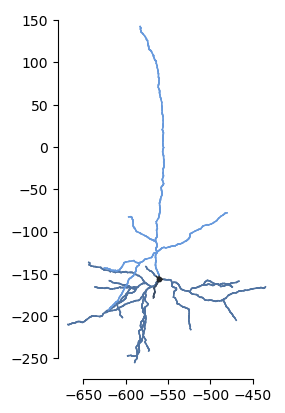

In [28]:
plot_neuron(neigh, feat)

#### Load dataloaders

In [29]:
train_loader, val_loader = build_dataloader(config)

100%|███████████████████████████████████████████| 43/43 [00:01<00:00, 28.79it/s]


In [30]:
features1, features2, adj_matrix1, adj_matrix2 = next(iter(train_loader))

In [31]:
neigh1 = adjacency_to_neighbors(adj_matrix1[0])
neigh2 = adjacency_to_neighbors(adj_matrix2[0])

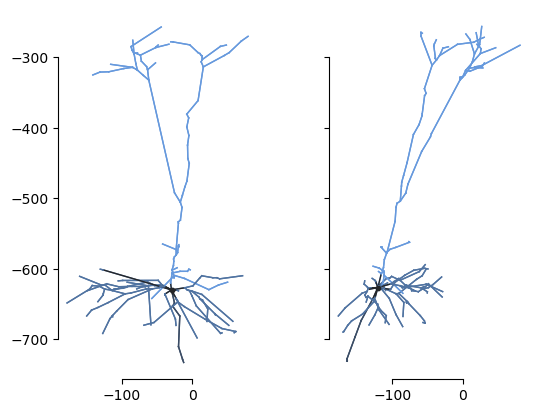

In [32]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

plot_neuron(neigh1, features1[0].numpy(), ax=ax[0])
plot_neuron(neigh2, features2[0].numpy(), ax=ax[1])